# Proje 1 - Pandas ile Veri Analizi
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __09.06.2021 Çarşamba saat 18:00'e kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz. 
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* DataFrame'in gerekli sütunlarını elde edebilmek için (örn: anketteki 7. soru ile ilgili tüm sütunlar) "```filter```" metodunu kullanmanız önerilir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [65]:
import pandas as pd
import numpy as np
survey_df = pd.read_csv("kaggle_survey_2020_responses.csv", skiprows=[1])

#ilk sütunu silelim
survey_df.drop(survey_df.columns[[0]], axis = 1, inplace = True)

#Sütun isimlerinin değiştirilmesi
new_columns = ["Age","Gender","Country","Education","Occupation","Coding_Experience"]
survey_df.columns = new_columns + survey_df.columns[6:].tolist() 

#Drop İşlemi
first_shape = survey_df.shape[0]
survey_df.dropna(subset = ['Education','Occupation','Coding_Experience'], inplace=True)
drop_shape = survey_df.shape[0]
count_nan = first_shape - drop_shape
print("Toplam NaN içeren, silinen Satır Sayısı:",count_nan)
print("DataFrame satır ve sütun sayısı: ",survey_df.shape)

survey_df.head()

Toplam NaN içeren, silinen Satır Sayısı: 916
DataFrame satır ve sütun sayısı:  (19120, 354)


,Age,Gender,Country,Education,Occupation,Coding_Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

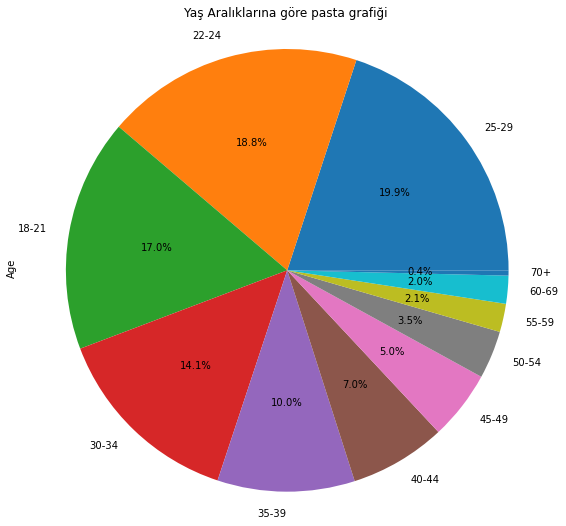

In [66]:
import matplotlib.pyplot as plt

#Yaş Aralıklarının isimlerinin bulunması
age_counts = survey_df['Age'].value_counts()

#piechart 
age_counts.plot.pie(autopct='%1.1f%%')
plt.title('Yaş Aralıklarına göre pasta grafiği')
plt.axis('equal')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [67]:
turkey_education = survey_df[survey_df['Country']== 'Turkey'].Education.value_counts()
turkey_education

Bachelor’s degree                                                    129
Master’s degree                                                      111
Doctoral degree                                                       50
Some college/university study without earning a bachelor’s degree     15
I prefer not to answer                                                 8
Professional degree                                                    6
No formal education past high school                                   3
Name: Education, dtype: int64

## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [68]:
## DAHA KOLAY BIR YOLU VARDIR

turkey_education = survey_df.groupby('Age').Occupation.value_counts().unstack()
turkey_education = turkey_education.eq(turkey_education.max(1), axis=0).dot(turkey_education.columns)
turkey_education

Age
18-21           Student
22-24           Student
25-29           Student
30-34    Data Scientist
35-39    Data Scientist
40-44    Data Scientist
45-49             Other
50-54             Other
55-59             Other
60-69             Other
70+      Data Scientist
dtype: object

## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

Python        15530
SQL            7535
R              4277
C++            3827
Java           3367
C              3315
Javascript     2995
MATLAB         2217
Other          1945
Bash           1776
Julia           262
None            206
Swift           198
dtype: int64 

Python        2453
SQL           1473
R              975
Bash           405
C++            323
Java           305
Javascript     290
C              247
Other          245
MATLAB         242
Julia           71
Swift           14
None             5
dtype: int64


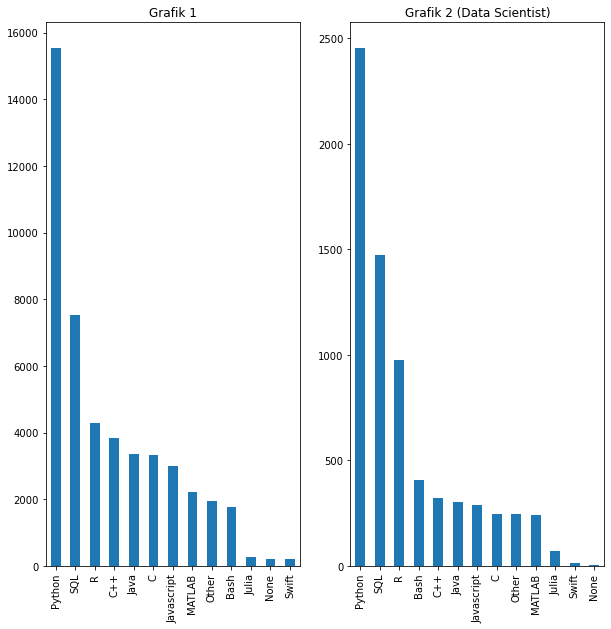

In [69]:
#Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralanması
language_counts = survey_df.filter(like='Q7', axis=1).stack().value_counts()
print(language_counts, "\n")

#Her bir programlama dilinin kaç Data Scientist tarafından kullanıldığını bulup büyükten küçüğe sıralanması
ds_lang_counts = survey_df[survey_df["Occupation"] == "Data Scientist"].filter(like="Q7", axis=1).stack().value_counts()
print(ds_lang_counts)

#Plotting
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
axes[0].set_title("Grafik 1")
language_counts.plot(ax=axes[0], kind='bar')
axes[1].set_title("Grafik 2 (Data Scientist)")
ds_lang_counts.plot(ax=axes[1], kind='bar')
plt.show()

## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

In [70]:
code_exp_by_ml1 = survey_df[survey_df['Occupation'] == 'Data Scientist'].Q15.dropna()
print("15. Soruyu kaç data scientist işaretlemiş?",code_exp_by_ml1.shape[0])

15. Soruyu kaç data scientist işaretlemiş? 2517


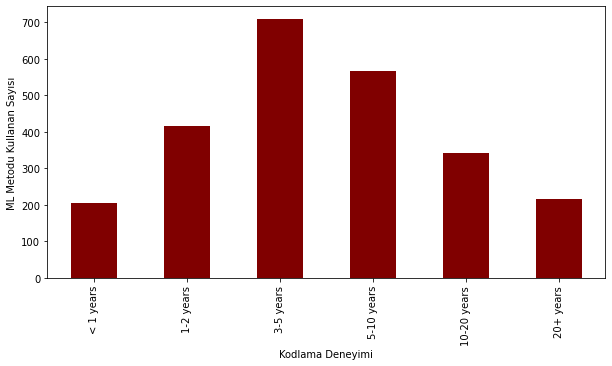

In [71]:
code_exp_by_ml = survey_df[survey_df['Occupation'] == 'Data Scientist'].groupby("Coding_Experience",sort=False).Q15.value_counts().unstack()

#Machine Learning metotlarını hiç kullanmayanları atalım
code_exp_by_ml = code_exp_by_ml.drop(columns=['I do not use machine learning methods'], axis=1)
code_exp_by_ml
sum_by_code_exp = code_exp_by_ml.sum(axis=1, skipna= True)

#Plot yaparken yılların sıralı olması açısından reindex işlemi yapılmalı
sum_by_code_exp = sum_by_code_exp.reindex(index=["< 1 years","1-2 years","3-5 years","5-10 years","10-20 years","20+ years"])
sum_by_code_exp

#plot
fig = plt.figure(figsize = (10, 5))
sum_by_code_exp.plot.bar(color="maroon",xlabel="Kodlama Deneyimi",ylabel="ML Metodu Kullanan Sayısı")
plt.show()


## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [72]:
#SONRA BAK EKSİKKKKKKKKKKK
scikit_counts = survey_df.filter(regex='^Q16', axis=1)
scikit_counts = scikit_counts[scikit_counts.iloc[:,0].isnull() == False]
scikit_counts = scikit_counts[scikit_counts.iloc[:,1:].isna() == True]
scikit_counts

,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [73]:
group_salary = survey_df.groupby("Occupation").Q24.value_counts()
group_salary

Occupation        Q24            
Business Analyst  $0-999             114
                  10,000-14,999       50
                  100,000-124,999     42
                  40,000-49,999       42
                  30,000-39,999       39
                                    ... 
Statistician      80,000-89,999        6
                  125,000-149,999      4
                  200,000-249,999      4
                  5,000-7,499          4
                  300,000-500,000      2
Name: Q24, Length: 267, dtype: int64

## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [74]:
colslist = ['#ISO','Country','neighbours']
country_info = pd.read_csv("https://download.geonames.org/export/dump/countryInfo.txt", sep="\t",skiprows=49, usecols=colslist)
country_info.set_index('Country', inplace= True)
country_info.rename(columns = {'#ISO' : 'Country Code'}, inplace = True)

#Country adına göre innerjoin metoduyla merge 
merged_survey = pd.merge(survey_df, country_info, on=['Country'], how='inner')
merged_survey

,Age,Gender,Country,Education,Occupation,Coding_Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Country Code,neighbours
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,CO,"EC,PE,PA,BR,VE"
1,55-59,Man,Colombia,Master’s degree,Data Scientist,10-20 years,Python,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,CO,"EC,PE,PA,BR,VE"
2,18-21,Man,Colombia,Some college/university study without earning ...,Student,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO,"EC,PE,PA,BR,VE"
3,25-29,Man,Colombia,Professional degree,Data Analyst,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,CO,"EC,PE,PA,BR,VE"
4,45-49,Man,Colombia,Master’s degree,Business Analyst,< 1 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,CO,"EC,PE,PA,BR,VE"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14788,22-24,Man,Sri Lanka,Bachelor’s degree,Student,1-2 years,Python,NaN,NaN,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LK,NaN
14789,22-24,Man,Sri Lanka,Bachelor’s degree,Student,1-2 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,LK,NaN
14790,22-24,Man,Sri Lanka,Bachelor’s degree,Student,< 1 years,Python,R,NaN,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LK,NaN
14791,22-24,Woman,Sri Lanka,Bachelor’s degree,Student,1-2 years,Python,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LK,NaN


## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [104]:
neighbours_de = merged_survey[merged_survey['Country'] == 'Germany'].neighbours.unique()
de_narray= neighbours_de[0].split(',')
de_narray.append('DE')
print(de_narray)
#Merged survey içinde artık sadece almanya ve komşuları mevcut
merged_survey = merged_survey[merged_survey['Country Code'].isin(de_narray)]
#Survey DataFrameinde verisi mecvut ülkeler için verilerin yazdırılması
merged_survey.groupby('Country').Education.value_counts()


['CH', 'PL', 'NL', 'DK', 'BE', 'CZ', 'LU', 'FR', 'AT', 'DE']


Country      Education                                                        
Belgium      Master’s degree                                                       38
             Doctoral degree                                                       13
             Bachelor’s degree                                                      6
             No formal education past high school                                   1
             Some college/university study without earning a bachelor’s degree      1
France       Master’s degree                                                      197
             Doctoral degree                                                       75
             Bachelor’s degree                                                     13
             Professional degree                                                   10
             I prefer not to answer                                                 6
             No formal education past high school            